<font style='color:red'>CH3. RNN(Recurrent Neural Netwok 순환신경망)</font>

# 1. 문맥을 이용하여 모델만들기

In [2]:
text = '''경마장에 있는 말이 뛰고 있다
그의 말이 법이다
가는 말이 고아야 오는 말이 곱다'''
text1 = '장마철이 오고 있다'

In [3]:
from keras_preprocessing .text import Tokenizer
t = Tokenizer()
t.fit_on_texts(texts= [text,text1])
encoded = t.texts_to_sequences([text, text1])
print(encoded)
print(t.word_index)

[[3, 4, 1, 5, 2, 6, 1, 7, 8, 1, 9, 10, 1, 11], [12, 13, 2]]
{'말이': 1, '있다': 2, '경마장에': 3, '있는': 4, '뛰고': 5, '그의': 6, '법이다': 7, '가는': 8, '고아야': 9, '오는': 10, '곱다': 11, '장마철이': 12, '오고': 13}


In [ ]:
from keras_preprocessing .text import Tokenizer
t = Tokenizer()
t.fit_on_texts([text])
encoded = t.texts_to_sequences
print(encoded)
print(t.word_index)

[[2, 3, 1, 4, 5, 6, 1, 7, 8, 1, 9, 10, 1, 11]]
{'말이': 1, '경마장에': 2, '있는': 3, '뛰고': 4, '있다': 5, '그의': 6, '법이다': 7, '가는': 8, '고아야': 9, '오는': 10, '곱다': 11}


In [6]:
# 문자열 리스트를 인덱스 시퀀스로 변환
print(t.texts_to_sequences(['경마장에 말이 있다']))
print(t.texts_to_sequences(['가는 말이 곱다']))

[[2, 1, 5]]
[[8, 1, 11]]


In [ ]:
for key, value in t.word_index.items():
    print(key, value)

말이 1
경마장에 2
있는 3
뛰고 4
있다 5
그의 6
법이다 7
가는 8
고아야 9
오는 10
곱다 11


In [33]:
# 학습을 시키기 위해 ['경마장에 있는','경마장에 있는 말이', ...]형태의 리스트 생성
sequences = []
for line in text.split('\n'):
    print('원문장 :',line)
    encoded = t.texts_to_sequences([line])[0]
    print('encoded :',encoded)
    for i in range(len(encoded)-1): # i : 시작 index
        for j in range(i+2, len(encoded)+1): # j : 끝나는 index바로 뒤
            sequences.append(encoded[i:j])
print('sequences와 해석 출력')
for sequence in sequences:
    print(sequence, ':' ,' '.join([t.index_word[s] for s in sequence]))

원문장 : 경마장에 있는 말이 뛰고 있다
encoded : [2, 3, 1, 4, 5]
원문장 : 그의 말이 법이다
encoded : [6, 1, 7]
원문장 : 가는 말이 고아야 오는 말이 곱다
encoded : [8, 1, 9, 10, 1, 11]
sequences와 해석 출력
[2, 3] : 경마장에 있는
[2, 3, 1] : 경마장에 있는 말이
[2, 3, 1, 4] : 경마장에 있는 말이 뛰고
[2, 3, 1, 4, 5] : 경마장에 있는 말이 뛰고 있다
[3, 1] : 있는 말이
[3, 1, 4] : 있는 말이 뛰고
[3, 1, 4, 5] : 있는 말이 뛰고 있다
[1, 4] : 말이 뛰고
[1, 4, 5] : 말이 뛰고 있다
[4, 5] : 뛰고 있다
[6, 1] : 그의 말이
[6, 1, 7] : 그의 말이 법이다
[1, 7] : 말이 법이다
[8, 1] : 가는 말이
[8, 1, 9] : 가는 말이 고아야
[8, 1, 9, 10] : 가는 말이 고아야 오는
[8, 1, 9, 10, 1] : 가는 말이 고아야 오는 말이
[8, 1, 9, 10, 1, 11] : 가는 말이 고아야 오는 말이 곱다
[1, 9] : 말이 고아야
[1, 9, 10] : 말이 고아야 오는
[1, 9, 10, 1] : 말이 고아야 오는 말이
[1, 9, 10, 1, 11] : 말이 고아야 오는 말이 곱다
[9, 10] : 고아야 오는
[9, 10, 1] : 고아야 오는 말이
[9, 10, 1, 11] : 고아야 오는 말이 곱다
[10, 1] : 오는 말이
[10, 1, 11] : 오는 말이 곱다
[1, 11] : 말이 곱다


In [37]:
print([len(sequence) for sequence in sequences])
my_len = max([len(sequence) for sequence in sequences])
my_len

[2, 3, 4, 5, 2, 3, 4, 2, 3, 2, 2, 3, 2, 2, 3, 4, 5, 6, 2, 3, 4, 5, 2, 3, 4, 2, 3, 2]


6

In [ ]:
# sequences를 훈련 가능하도록 모두 6개로 조정
from tensorflow.keras.preprocessing.sequence import pad_sequences 
padded_sequences = pad_sequences(sequences=sequences, 
                  maxlen=my_len,         
                  padding='pre')
# padded_sequences
padded_sequences.shape

(28, 6)

In [49]:
X = padded_sequences[:,:-1]
y = padded_sequences[:, -1]
X.shape, y.shape

((28, 5), (28,))

In [ ]:
# X를 컴퓨터가 임베딩 작업할 때 필요한 입력 bit 수 (단어수 + 1) 
input_dim = len(t.word_index)+1
input_dim

12

In [59]:
# y의 원핫인코딩
from keras.utils import to_categorical
Y = to_categorical(y, input_dim)
X.shape, Y.shape, input_dim

((28, 5), (28, 12), 12)

In [63]:
# 2. 모델 생성하기
from keras.models import Sequential
from keras.layers import Embedding # Xi의 원핫인코딩한 희소행렬 변환
from keras.layers import SimpleRNN, Dense
import matplotlib.pyplot as plt

model = Sequential()
model.add(Embedding(input_dim=input_dim, # 12개로 원핫인코딩
                    output_dim=10, # 임베딩 출력의 갯수
                    input_length=X.shape[1])) # 입력 X의 수
model.add(SimpleRNN(32))
model.add(Dense(units=12, activation='softmax'))
print(model.summary())

# 3. 모델 학습 과정 설정
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# 모델 학습시키기
hist = model.fit(X, Y, epochs=300)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 5, 10)             120       
                                                                 
 simple_rnn_2 (SimpleRNN)    (None, 32)                1376      
                                                                 
 dense_1 (Dense)             (None, 12)                396       
                                                                 
Total params: 1,892
Trainable params: 1,892
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/300
1/1 [==============================] - 1s 1s/step - loss: 2.4848 - accuracy: 0.1429
Epoch 2/300
1/1 [==============================] - 0s 5ms/step - loss: 2.4725 - accuracy: 0.1429
Epoch 3/300
1/1 [==============================] - 0s 7ms/step - loss: 2.4605 - accuracy: 0.1786
Epoch 4/300
1/1 [====

Text(0, 0.5, 'acc')

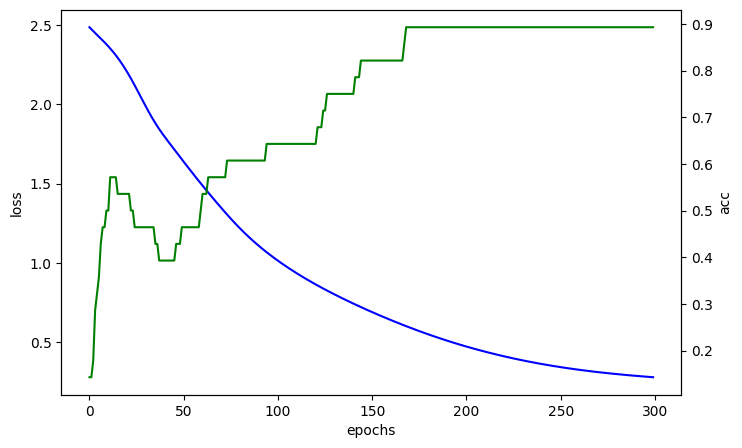

In [66]:
fig, loss_ax = plt.subplots(figsize=(8,5))

loss_ax.plot(hist.history['loss'], 'b', label='train loss')
acc_ax = loss_ax.twinx()
acc_ax.plot(hist.history['accuracy'], 'g', label='train accracy')
loss_ax.set_xlabel('epochs')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('acc')

In [ ]:
# 모델 사용하기 ( 경마장에 -> 있는)
encoded = t.texts_to_sequences(['경마장에 있는 말이'])[0]
input_data = pad_sequences([encoded], maxlen=my_len-1, padding='pre')
print('입력데이터 :',input_data)
result = model.predict(input_data)
t.index_word[result.argmax()]

입력데이터 : [[0 0 2 3 1]]
1/1 [==============================] - 0s 28ms/step


'뛰고'

# 2. 다음 문맥 예측해 보기

In [139]:
# '경마장에' 이후에 올 단어 3개 예측 -> 경마장에 있는 말이 뛰고
def sentence_generation(model, t, current_word, n):
    for i in range(n):
        encoded = t.texts_to_sequences([current_word])[0]
        input_data = pad_sequences([encoded], maxlen=my_len-1, padding='pre')
        result = model.predict(input_data,verbose=0)
        current_word += ' ' + t.index_word[result.argmax()]
    return current_word

sentence_generation(model, t, '경마장에', 4) 

'경마장에 있는 말이 뛰고 있다'

In [159]:
sentence_generation(model, t, '가는', 5) 

'가는 말이 고아야 오는 말이 곱다'